# Sesion 3: Recommender System

You need to read the theory lectures before practicing with this notebook:
- [Preclass S3](https://hackmd.io/@KylePaul/ML_Preclass_S3)
- [Slide](https://hackmd.io/@KylePaul/ML_Slide_S3)

```{contents}

```

# Book Recommender

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
!unzip "/content/drive/MyDrive/Colab Notebooks/ML-intensive/data/clean_books_data.zip" -d "/content/"

Archive:  /content/drive/MyDrive/Colab Notebooks/ML-intensive/data/clean_books_data.zip
   creating: /content/clean_books_data/
  inflating: /content/clean_books_data/users.csv  
  inflating: /content/clean_books_data/books.csv  
  inflating: /content/clean_books_data/ratings.csv  


## K-nearest Neighbors

### Import the datasets

In [28]:
import pandas as pd
import numpy as np

In [83]:
df_book = pd.read_csv("/content/clean_books_data/books.csv")
df_user = pd.read_csv("/content/clean_books_data/users.csv")
df_rate = pd.read_csv("/content/clean_books_data/ratings.csv")

### Explore the datasets

In [30]:
print(df_book.shape)
print(df_user.shape)
print(df_rate.shape)

(2161, 8)
(42828, 3)
(234876, 3)


In [31]:
print(df_book.columns)
df_book

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...
1,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...,http://images.amazon.com/images/P/0452264464.0...
2,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
3,0345402871,Airframe,Michael Crichton,1997,Ballantine Books,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...,http://images.amazon.com/images/P/0345402871.0...
4,0345417623,Timeline,MICHAEL CRICHTON,2000,Ballantine Books,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...,http://images.amazon.com/images/P/0345417623.0...
...,...,...,...,...,...,...,...,...
2156,0140039589,Watership Down,Richard Adams,1974,Penguin Books,http://images.amazon.com/images/P/0140039589.0...,http://images.amazon.com/images/P/0140039589.0...,http://images.amazon.com/images/P/0140039589.0...
2157,0061092886,The Fallen Man (Joe Leaphorn Novels),Tony Hillerman,1997,HarperTorch,http://images.amazon.com/images/P/0061092886.0...,http://images.amazon.com/images/P/0061092886.0...,http://images.amazon.com/images/P/0061092886.0...
2158,0553575090,Deception on His Mind,ELIZABETH GEORGE,1998,Bantam,http://images.amazon.com/images/P/0553575090.0...,http://images.amazon.com/images/P/0553575090.0...,http://images.amazon.com/images/P/0553575090.0...
2159,067155302X,Harvest,Tess Gerritsen,1997,Pocket,http://images.amazon.com/images/P/067155302X.0...,http://images.amazon.com/images/P/067155302X.0...,http://images.amazon.com/images/P/067155302X.0...


In [32]:
print(df_user.columns)
df_user

Index(['User-ID', 'Location', 'Age'], dtype='object')


,User-ID,Location,Age
0,9,"germantown, tennessee, usa",NaN
1,14,"mediapolis, iowa, usa",NaN
2,16,"albuquerque, new mexico, usa",NaN
3,17,"chesapeake, virginia, usa",NaN
4,26,"bellevue, washington, usa",NaN
...,...,...,...
42823,278843,"pismo beach, california, usa",28.0
42824,278844,"st. paul, minnesota, usa",28.0
42825,278846,"toronto, ontario, canada",23.0
42826,278851,"dallas, texas, usa",33.0


In [33]:
print(df_rate.columns)
df_rate

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276727,0446520802,0
2,276744,038550120X,7
3,276746,0425115801,0
4,276746,0449006522,0
...,...,...,...
234871,276704,0345386108,6
234872,276704,0446353957,0
234873,276704,0446605409,0
234874,276704,0743211383,7


### Process the data

#### TODO 1

Drop out all the lines in `df_book` whose data of 4 columns `["Book-Title", "Book-Author", "Year-Of-Publication", "Publisher"]` duplicate

In [84]:
# YOUR SOLUTION
df_book.drop_duplicates(
    subset=["Book-Title", "Book-Author", "Year-Of-Publication", "Publisher"],
    keep="last",
    inplace=True
)

In [35]:
df_book.shape

(2159, 8)

#### TODO 2

Delete lines with `Book-Rating` of 0 in `df_rate` and then delete `user` and `book` correspondingly

In [36]:
df_rate.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276727,0446520802,0
2,276744,038550120X,7
3,276746,0425115801,0
4,276746,0449006522,0


In [37]:
df_rate["ISBN"].unique()

array(['034545104X', '0446520802', '038550120X', ..., '0345450728',
       '0385720114', '0451180216'], dtype=object)

In [85]:
df_rate["ISBN"].replace({
  "0670894605": "0670032379",
  "014100018X": "0140282033"
}, inplace=True )

df_rate = df_rate[df_rate["Book-Rating"] > 0]
df_book = df_book[df_book["ISBN"].isin(df_rate["ISBN"].unique())]
df_user = df_user[df_user["User-ID"].isin(df_rate["User-ID"].unique())]

In [39]:
df_book.shape, df_user.shape, df_rate.shape

((2159, 8), (30581, 3), (93802, 3))

In [15]:
93802 / (30581 * 2159)

0.0014207176412821695

#### TODO 3

Use `LabelEncoder` to convert `User-IDs` and `ISBNs` into incremental numbers

In [87]:
from sklearn.preprocessing import LabelEncoder

# YOUR SOLUTION
user_encoder = LabelEncoder()
user_encoder.fit(df_user["User-ID"].unique())

book_encoder = LabelEncoder()
book_encoder.fit(df_book["ISBN"].unique())

df_user["User-ID"] = user_encoder.transform(df_user["User-ID"].values)
df_book["ISBN"] = book_encoder.transform(df_book["ISBN"].values)
df_rate["User-ID"] = user_encoder.transform(df_rate["User-ID"].values)
df_rate["ISBN"] = book_encoder.transform(df_rate["ISBN"].values)

### Pivot Table & Compressed Sparse Row (CSR)

In [17]:
print(df_rate.shape)
df_rate.head()

(93802, 3)


,User-ID,ISBN,Book-Rating
2,30357,661,7
7,30358,30,9
9,30358,1760,9
10,30359,1908,8
11,30360,1266,5


In [88]:
pivot = df_rate.pivot_table(columns="User-ID", index="ISBN", values="Book-Rating")
pivot.head()

User-ID,0,1,2,3,4,5,6,7,8,9,...,30571,30572,30573,30574,30575,30576,30577,30578,30579,30580
ISBN,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
# fill empty values
pivot.fillna(0, inplace=True)
pivot.head()

User-ID,0,1,2,3,4,5,6,7,8,9,...,30571,30572,30573,30574,30575,30576,30577,30578,30579,30580
ISBN,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
pivot.shape

(2159, 30581)

To avoid wasting the computer memory resources, we have another type of data structure called CSR

In [43]:
from scipy.sparse import csr_matrix

data = csr_matrix(pivot.values)
data

<2159x30581 sparse matrix of type '<class 'numpy.float64'>'
	with 93801 stored elements in Compressed Sparse Row format>

Explain how the sparse matrix has been compressed into the Compressed Sparse Row format (csr_matrix)

In [22]:
# Let take a simple matrix a
a = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 9, 0, 0],
    [1, 0, 0, 5, 0],
    [0, 1, 2, 0, 0]
])

csr = csr_matrix(a)
csr

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [23]:
# the csr only saves the position (i,j) of the value with i and j starting from 0
# (row_index, col_index) value
print(csr)

  (1, 2)	9
  (2, 0)	1
  (2, 3)	5
  (3, 1)	1
  (3, 2)	2


In [24]:
# The csr matrix will use the saved values as below to recontruct the original matrix
print(csr.shape)
print(csr.data)
print(csr.indices) # col index
print(csr.indptr)  # row count using prefix sum

(4, 5)
[9 1 5 1 2]
[2 0 3 1 2]
[0 0 1 3 5]


Quiz: How to reconstruct the dataset with the `csr matrix`? Try to think yourself based on the above values

### Apply K-nearest Neighbors (KNN)

#### TODO 4

Apply the algorithm `NearestNeighbors` from `sklearn` on the `data`

In [81]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric="cosine")
model.fit(data)

NearestNeighbors(metric='cosine')

The `metric="cosine"` parameter means that the **NearestNeighbors** model will use the **cosine similarity** between samples in the data to find the nearest neighbors. Cosine similarity is a measure of how similar two vectors are based on their angle, not their magnitude. It is calculated as the normalized dot product of the vectors:

$$\text{cosine similarity} = \frac{\vec{x} \cdot \vec{y}}{\|\vec{x}\| \|\vec{y}\|}$$

The cosine similarity ranges from -1 to 1, where 1 means the vectors are identical, 0 means they are orthogonal (perpendicular), and -1 means they are opposite. The cosine distance is defined as 1 minus the cosine similarity, so it ranges from 0 to 2, where 0 means the vectors are identical and 2 means they are opposite.

The breakdown of the code - we will implement step by step

In [46]:
df_book.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [47]:
book_indices = df_book[df_book["Book-Title"].str.contains("The Lord of the Rings")]["ISBN"].values
book_indices

array([ 351,  350,  349,  352, 1667, 1666])

Note: use the apostrophe instead of double quotes when calling the column name to avoid contracdition.

In [90]:
pivot.shape

(2159, 30581)

In [91]:
print(pivot.iloc[351, :].shape)  # we take 351-nd row of pivot
print(pivot.iloc[351,:])

(30581,)
User-ID
0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
30576    0.0
30577    0.0
30578    0.0
30579    0.0
30580    0.0
Name: 351, Length: 30581, dtype: float64


In [92]:
temp = pivot.iloc[351, :].values.reshape(1, -1)
temp.shape

(1, 30581)

In [93]:
dis, id = model.kneighbors(pivot.iloc[351, :].values.reshape(1, -1), n_neighbors=10)

In [94]:
print(dis.shape)
print(dis)
print(id.shape)
print(id)
print(id[0][0])

(1, 10)
[[1.11022302e-15 4.99368672e-01 6.19872520e-01 7.73240935e-01
  8.49165770e-01 8.97718820e-01 9.09579159e-01 9.20324384e-01
  9.24739463e-01 9.26032498e-01]]
(1, 10)
[[ 351  352  350  349  340 1666 1475 1476  733 2076]]
351


In [96]:
df_book[df_book['ISBN'] == id[0][0]]['Book-Title'].values

array(['The Two Towers (The Lord of the Rings, Part 2)'], dtype=object)

In [97]:
for i in id[0, 1:]:
  print(df_book[df_book['ISBN'] == i]['Book-Title'].values)

['The Return of the King (The Lord of the Rings, Part 3)']
['The Fellowship of the Ring (The Lord of the Rings, Part 1)']
['The Hobbit : The Enchanting Prelude to The Lord of the Rings']
['The Silmarillion']
['The Fellowship of the Ring (The Lord of the Rings, Part 1)']
['Anne of Ingleside (Anne of Green Gables Novels (Paperback))']
['Anne of Windy Poplars (Anne of Green Gables Novels (Paperback))']
['Whispers']
['City of Golden Shadow (Otherland, Volume 1)']


Then, I combine into a neat block of code

In [50]:
dis, id = model.kneighbors(pivot.iloc[351, :].values.reshape(1, -1), n_neighbors=10)
print(f"Similar books {df_book[df_book['ISBN'] == id[0][0]]['Book-Title'].values}")
for i in id[0, 1:]:s
  print(df_book[df_book['ISBN'] == i]['Book-Title'].values)

Similar books ['The Two Towers (The Lord of the Rings, Part 2)']
['The Return of the King (The Lord of the Rings, Part 3)']
['The Fellowship of the Ring (The Lord of the Rings, Part 1)']
['The Hobbit : The Enchanting Prelude to The Lord of the Rings']
['The Silmarillion']
['The Fellowship of the Ring (The Lord of the Rings, Part 1)']
['Anne of Ingleside (Anne of Green Gables Novels (Paperback))']
['Anne of Windy Poplars (Anne of Green Gables Novels (Paperback))']
['Whispers']
['City of Golden Shadow (Otherland, Volume 1)']


## Matrix Factorization

### Import the dataset

In [98]:
import pandas as pd
import numpy as np

In [99]:
df_book = pd.read_csv("/content/clean_books_data/books.csv")
df_user = pd.read_csv("/content/clean_books_data/users.csv")
df_rate = pd.read_csv("/content/clean_books_data/ratings.csv")

### Preprocess the data (we have done above)

In [100]:
# remove duplicate
df_book.drop_duplicates(subset=["Book-Title", "Book-Author",	"Year-Of-Publication",	"Publisher"], keep="last", inplace=True)
df_rate["ISBN"].replace({
  "0670894605": "0670032379",
  "014100018X": "0140282033"
}, inplace=True )

# remove rating == 0
df_rate = df_rate[df_rate["Book-Rating"] > 0]
df_book = df_book[df_book["ISBN"].isin(df_rate["ISBN"].values)]
df_user = df_user[df_user["User-ID"].isin(df_rate["User-ID"].values)]

# remove user < 20 rating
filter = df_rate["User-ID"].value_counts().values >= 20
indices = df_rate["User-ID"].value_counts().index[filter]
df_rate = df_rate[df_rate["User-ID"].isin(indices)]
df_book = df_book[df_book["ISBN"].isin(df_rate["ISBN"].values)]
df_user = df_user[df_user["User-ID"].isin(df_rate["User-ID"].values)]

# label encoder
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
book_encoder = LabelEncoder()

user_encoder.fit(df_rate["User-ID"].unique())
book_encoder.fit(df_rate["ISBN"].unique())

df_rate["User-ID"] = user_encoder.transform(df_rate["User-ID"].values)
df_rate["ISBN"] = book_encoder.transform(df_rate["ISBN"].values)

df_user["User-ID"] = user_encoder.transform(df_user["User-ID"].values)
df_book["ISBN"] = book_encoder.transform(df_book["ISBN"].values)

In [101]:
df_rate.shape, df_book.shape, df_user.shape

((25297, 3), (2152, 8), (665, 3))

![](https://i.imgur.com/DFIg0LI.png)

In [103]:
user_len = df_user.shape[0]
book_len = df_book.shape[0]

LATENT_DIM = 16

Normalize data

In [105]:
from sklearn.preprocessing import StandardScaler

users = df_rate["User-ID"].values
books = df_rate["ISBN"].values
ratings = df_rate["Book-Rating"].values.reshape(-1,1)

scaler = StandardScaler()
ratings = scaler.fit_transform(ratings)

Create layers to initialize model

In [112]:
from pickle import EMPTY_SET
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Embedding, Input, Dot, Add, Activation

# create embedding for user
user_input = Input(shape=(1,))
user_embed = Embedding(user_len, LATENT_DIM, name="user_embed")

# create embedding book
book_input = Input(shape=(1,))
book_embed = Embedding(book_len, LATENT_DIM, name="book_embed")

# dot product between user_vector và book_vector
dot = Dot(axes=2)

In [113]:
# In addition, for better performance, we can crate more bias for user and book
# rating = user_vector @ book_vector + user_bias + book_bias
# There are user_len bias and each bias is 1 number
user_bias = Embedding(user_len, 1, name="user_bias")
book_bias = Embedding(book_len, 1, name="book_bias")

# layer Add (addition operation)
add = Add()

In [114]:
# connect layer
user_embed = user_embed(user_input)
book_embed = book_embed(book_input)

# Bias layers also take in user_input and book_input
user_bias = user_bias(user_input)
book_bias = book_bias(book_input)

# Connect 2 embeddings = dot product
dot = dot([user_embed, book_embed])

# Connect dot and bias
add = add([dot, user_bias, book_bias])

In [115]:
# Initialize model
## input is 2 input
## output is the result of addition operation (equivalent to rating)
model = Model(inputs=[user_input, book_input], outputs=add)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 user_embed (Embedding)         (None, 1, 16)        10640       ['input_3[0][0]']                
                                                                                                  
 book_embed (Embedding)         (None, 1, 16)        34432       ['input_4[0][0]']                
                                                                                              

Visualization

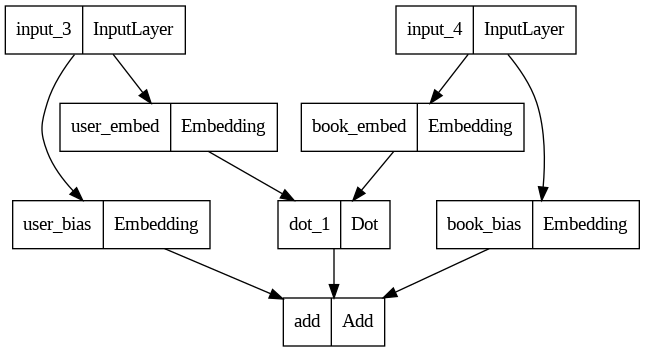

In [116]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [117]:
df_rate["Book-Rating"].value_counts()

8     6406
10    5171
9     4854
7     4021
5     2365
6     1745
4      354
3      199
2       94
1       88
Name: Book-Rating, dtype: int64

Compile and fit model

In [119]:
from tensorflow.keras.metrics import RootMeanSquaredError

model.compile(loss="mse", optimizer="adam", metrics=[RootMeanSquaredError(), "mae"])
model.fit([users, books], ratings, epochs=20)

Epoch 1/20
791/791 [==============================] - 8s 9ms/step - loss: 0.5561 - root_mean_squared_error: 0.7457 - mae: 0.5583
Epoch 2/20
791/791 [==============================] - 3s 4ms/step - loss: 0.4656 - root_mean_squared_error: 0.6824 - mae: 0.4981
Epoch 3/20
791/791 [==============================] - 4s 5ms/step - loss: 0.3861 - root_mean_squared_error: 0.6214 - mae: 0.4451
Epoch 4/20
791/791 [==============================] - 5s 6ms/step - loss: 0.3197 - root_mean_squared_error: 0.5655 - mae: 0.3992
Epoch 5/20
791/791 [==============================] - 3s 4ms/step - loss: 0.2656 - root_mean_squared_error: 0.5154 - mae: 0.3602
Epoch 6/20
791/791 [==============================] - 3s 4ms/step - loss: 0.2218 - root_mean_squared_error: 0.4710 - mae: 0.3262
Epoch 7/20
791/791 [==============================] - 3s 4ms/step - loss: 0.1867 - root_mean_squared_error: 0.4321 - mae: 0.2979
Epoch 8/20
791/791 [==============================] - 4s 5ms/step - loss: 0.1584 - root_mean_squa

In [120]:
df_rate[df_rate["Book-Rating"] == 7].head()

,User-ID,ISBN,Book-Rating
288,664,970,7
1751,0,1680,7
1754,0,1864,7
2524,1,950,7
2727,2,669,7


In [121]:
user = np.array([[30379]])
book = np.array([[1129]])

scaler.inverse_transform(model.predict([user,book])[0]).astype(int)

1/1 [==============================] - 0s 94ms/step


array([[7]])